# Reducing the number of auxiliary qubits in Grovers Algorithm

In [7]:
from pytket.circuit import Circuit, Qubit, OpType
from pytket.extensions.qiskit import tk_to_qiskit, AerBackend
from pytket.utils import probs_from_counts


### **Basic setup of auxiliary qubits**

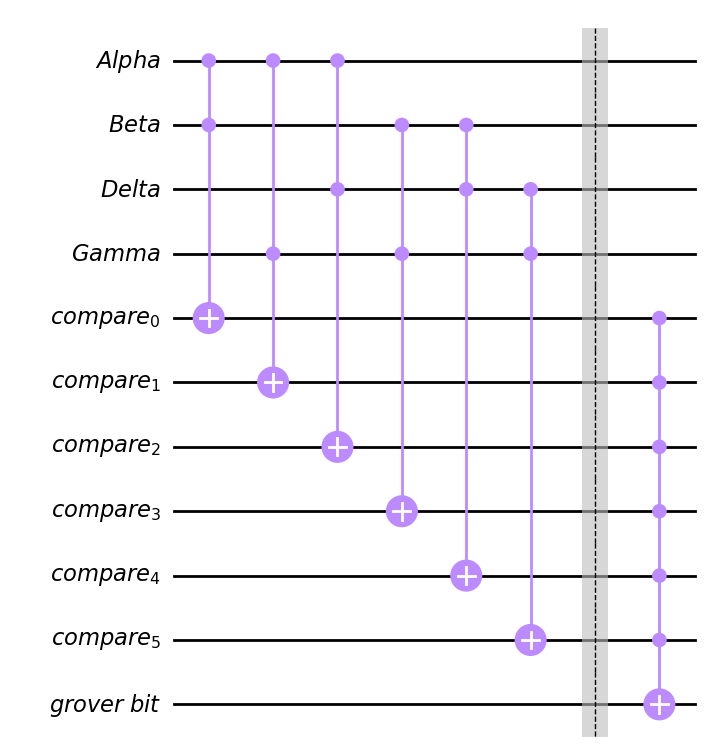

In [8]:
grover_oracle = Circuit()

# Coding qubits
alpha = Qubit("Alpha", 0)
beta = Qubit("Beta", 0)
gamma = Qubit("Gamma", 0)
delta = Qubit("Delta", 0)
grover_oracle.add_qubit(alpha)
grover_oracle.add_qubit(beta)
grover_oracle.add_qubit(gamma)
grover_oracle.add_qubit(delta)

# Auxiliary qubits
auxiliar_reg = Circuit()
auxiliar_reg.add_q_register("compare", 6)
grover_oracle.append(auxiliar_reg)

# Grover bit
grover_bit = Qubit("grover bit", 0)
grover_oracle.add_qubit(grover_bit)

# Comparing operations
grover_oracle.CCX(alpha, beta, Qubit("compare", 0))
grover_oracle.CCX(alpha, gamma, Qubit("compare", 1))
grover_oracle.CCX(alpha, delta, Qubit("compare", 2))
grover_oracle.CCX(beta, gamma, Qubit("compare", 3))
grover_oracle.CCX(beta, delta, Qubit("compare", 4))
grover_oracle.CCX(gamma, delta, Qubit("compare", 5))

grover_oracle.add_barrier(grover_oracle.qubits)

grover_oracle.add_gate(OpType.CnX, auxiliar_reg.qubits + [grover_bit])

tk_to_qiskit(grover_oracle).draw('mpl', style="clifford")



In [16]:
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(grover_oracle)

handle = backend.process_circuit(compiled_circ, n_shots=2000)
counts = backend.get_result(handle).get_counts()
print(counts)

print(probs_from_counts(counts))

Counter({(): 2000})
{(): 1.0}


In [15]:


circ = Circuit(2, 2)
circ.H(0).X(1).measure_all()
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)

handle = backend.process_circuit(compiled_circ, n_shots=2000)
counts = backend.get_result(handle).get_counts()
print(counts)

print(probs_from_counts(counts))

Counter({(0, 1): 1013, (1, 1): 987})
{(0, 1): 0.5065, (1, 1): 0.4935}


In [10]:
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend

circ = Circuit(2, 2)
circ.H(0).X(1).measure_all()
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)

handle = backend.process_circuit(compiled_circ, n_shots=20)
shots = backend.get_result(handle).get_shots()
print(shots)

[[0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
